[Download dataset](https://www.kaggle.com/datasets/yagunnersya/fifa-21-messy-raw-dataset-for-cleaning-exploring/data?select=fifa21_raw_data.csv)

* Data Preparation
* Data Cleaning & Transformation
    + Do the height and weight columns have the appropriate data types?
    + Can you separate the joined column into year, month and day columns?
    + Can you clean and transform the value, wage and release clause columns into columns of integers?
    + How can you remove the newline characters from the Hits column?
    + Should you separete the Team & Contract column into separate team and contract columns?
* Data Exploration and Visualization
    + Lets see the Nationality of players
    + Players Age range is from 53-23 years lets see age of all the players.
    + Number of Hits by top 10 Players with Highest Hits
    + Lets see for best players having highest OVA and Hits
    + Lets see how many teams participate in FIFA 2021
    + Lets find which teams has the best 100 FIFA players?

# Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../Datasets/fifa21_raw_data.csv', low_memory=False)

In [3]:
data.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [4]:
data.tail()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
18974,https://cdn.sofifa.com/players/257/710/21_60.png,Mengxuan Zhang,http://sofifa.com/player/257710/mengxuan-zhang...,China PR,CB,Zhang Mengxuan,21,47,52,\n\n\n\nChongqing Dangdai Lifan FC SWM Team\n2...,...,Low,Low,1 ★,58,23,26,27,50,48,\n2
18975,https://cdn.sofifa.com/players/258/736/21_60.png,Vani Da Silva,http://sofifa.com/player/258736/vani-da-silva/...,England,ST,V. Da Silva,17,47,67,\n\n\n\nOldham Athletic\n2020 ~ 2021\n\n,...,Medium,Medium,1 ★,70,46,40,53,16,40,\n3
18976,https://cdn.sofifa.com/players/247/223/21_60.png,Ao Xia,http://sofifa.com/player/247223/ao-xia/210005/,China PR,CB,Xia Ao,21,47,55,\n\n\n\nWuhan Zall\n2018 ~ 2022\n\n,...,Medium,Medium,1 ★,64,28,26,38,48,51,\n3
18977,https://cdn.sofifa.com/players/258/760/21_60.png,Ben Hough,http://sofifa.com/player/258760/ben-hough/210005/,England,CM,B. Hough,17,47,67,\n\n\n\nOldham Athletic\n2020 ~ 2021\n\n,...,Medium,Medium,1 ★,64,40,48,49,35,45,\n5
18978,https://cdn.sofifa.com/players/255/958/21_60.png,Mateo Flores,http://sofifa.com/player/255958/mateo-flores/2...,Bolivia,CDM,M. Flores,19,47,63,\n\n\n\nClub Bolívar\n2020 ~ 2024\n\n,...,Medium,Medium,1 ★,57,32,43,48,44,49,\n2


In [5]:
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])

Number of Rows: 18979
Number of Columns: 77


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

In [7]:
print("Any Missing Value?",data.isnull().values.any())

Any Missing Value? True


In [8]:
dup = data.duplicated().any()
print("Are there any duplicated value in data?", dup)

Are there any duplicated value in data? True


In [9]:
data.describe()

,Age,↓OVA,POT,ID,BOV,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,...,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,25.194583,65.718636,71.136098,226404.790242,66.751620,5.417461,248.938616,49.688551,45.842932,51.941883,...,16.217609,16.519205,1595.293851,355.703040,67.454239,53.457716,57.681069,62.875494,49.865904,64.368618
std,4.710753,6.968999,6.114176,27141.673349,6.747017,5.663954,74.299764,18.131334,19.566978,17.293626,...,17.002134,17.854185,269.883542,40.762282,10.678058,13.827229,10.081914,9.927875,16.442730,9.601665
min,16.000000,47.000000,47.000000,41.000000,48.000000,0.000000,42.000000,6.000000,3.000000,5.000000,...,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,21.000000,61.000000,67.000000,210135.000000,62.000000,0.000000,222.000000,38.000000,30.000000,44.000000,...,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,25.000000,66.000000,71.000000,232424.000000,67.000000,4.000000,263.000000,54.000000,49.000000,55.000000,...,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,29.000000,70.000000,75.000000,246925.500000,71.000000,9.000000,297.000000,63.000000,62.000000,64.000000,...,14.000000,14.000000,1781.000000,384.000000,75.000000,64.000000,64.000000,69.000000,63.000000,71.000000
max,53.000000,93.000000,95.000000,259216.000000,93.000000,26.000000,437.000000,94.000000,95.000000,93.000000,...,91.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000


# Data Cleaning & Transformation

## Do the height and weight columns have the appropriate data types?

In [10]:
data.columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits

In [11]:
print(data[['Height','Weight']].dtypes)
print(data[['Height','Weight']])

Height    object
Weight    object
dtype: object
      Height  Weight
0       5'7"  159lbs
1       6'2"  183lbs
2       6'2"  192lbs
3      5'11"  154lbs
4       5'9"  150lbs
...      ...     ...
18974  5'10"  154lbs
18975   5'7"  128lbs
18976  5'10"  146lbs
18977   5'9"  143lbs
18978   5'9"  150lbs

[18979 rows x 2 columns]


- Giải thích:
    + 1 lbs là 1 pounds
    + 5'7" là 5 feet(foot) + 7 inches
- Quy ước:
    + 1 pounds = 0,45359237 kg
    + 1 feet = 12 inch = 30.48 cm 
    + 1 inch = 2.54 cm
  

In [12]:
def pounds_to_kg(w):
    w = w.replace("lbs", '')
    w = round(int(w) * 0.45359237) 
    return w 
    
data['Weight'] = data['Weight'].apply(pounds_to_kg)

data = data.rename(columns = {'Weight':'Weight_kg'})

In [13]:
def feet_inches_to_m(h):
    feet, inches = h.split("'")
    inches = inches.replace("\"", "")
    h = round( int(feet) * 30.48 + int(inches) * 2.54 )
    return h
    
data['Height'] = data['Height'].apply(feet_inches_to_m)

data = data.rename(columns = {'Height':'Height_cm'})

In [14]:
data[['Weight_kg', 'Height_cm']]

,Weight_kg,Height_cm
0,72,170
1,83,188
2,87,188
3,70,180
4,68,175
...,...,...
18974,70,178
18975,58,170
18976,66,178
18977,65,175


## Can you separate the joined column into year, month and day columns?

In [15]:
data['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2        Jul 16, 2014
3        Aug 30, 2015
4         Aug 3, 2017
             ...     
18974     Aug 1, 2020
18975     Aug 1, 2020
18976    Jul 13, 2018
18977     Aug 1, 2020
18978     Jan 1, 2020
Name: Joined, Length: 18979, dtype: object

In [16]:
temp_df = data['Joined'].str.replace(",", "").str.split(expand=True)
data['Month'], data['Day'], data['Year'] = temp_df[0], temp_df[1], temp_df[2]

In [17]:
month_dict = {
        'Jan': 1,
        'Feb': 2,
        'Mar': 3,
        'Apr': 4,
        'May': 5,
        'Jun': 6,
        'Jul': 7,
        'Aug': 8,
        'Sep': 9,
        'Oct': 10,
        'Nov': 11,
        'Dec': 12,
    }

data['Month'] = data['Month'].map(month_dict)

In [18]:
data[[ 'Day', 'Month', 'Year' ]] = data[[ 'Day', 'Month', 'Year' ]].astype(int)

In [19]:
data[[ 'Day', 'Month', 'Year' ]]

,Day,Month,Year
0,1,7,2004
1,10,7,2018
2,16,7,2014
3,30,8,2015
4,3,8,2017
...,...,...,...
18974,1,8,2020
18975,1,8,2020
18976,13,7,2018
18977,1,8,2020


## Can you clean and transform the value, wage and release clause columns into columns of integers?

In [20]:
data[[ 'Value', 'Wage', 'Release Clause' ]]

,Value,Wage,Release Clause
0,€67.5M,€560K,€138.4M
1,€46M,€220K,€75.9M
2,€75M,€125K,€159.4M
3,€87M,€370K,€161M
4,€90M,€270K,€166.5M
...,...,...,...
18974,€35K,€1K,€57K
18975,€60K,€500,€165K
18976,€40K,€1K,€70K
18977,€60K,€500,€165K


In [21]:
def to_number(s):
    value = s[1:]
    if 'M' in s:
        value = value[:-1]
        value = float(value) * 1000000
    elif 'K' in s:
        value = value[:-1]
        value = float(value) * 1000
    return round(int(value))


In [22]:
data['Value'] = data['Value'].apply(to_number)

data['Wage'] = data['Wage'].apply(to_number)

data['Release Clause'] = data['Release Clause'].apply(to_number)

In [23]:
data[[ 'Value', 'Wage', 'Release Clause' ]]

,Value,Wage,Release Clause
0,67500000,560000,138400000
1,46000000,220000,75900000
2,75000000,125000,159400000
3,87000000,370000,161000000
4,90000000,270000,166500000
...,...,...,...
18974,35000,1000,57000
18975,60000,500,165000
18976,40000,1000,70000
18977,60000,500,165000


## How can you remove the newline characters from the Hits column?

In [24]:
data['Hits'] = data['Hits'].replace("\n", "", regex=True)

In [25]:
def hits_number(s):
    if 'K' in s:
        s = s[:-1]
        s = float(s) * 1000
    return int(s)

In [26]:
data['Hits'] = data['Hits'].apply(hits_number)

In [27]:
data['Hits'].sort_values()

8696        1
6814        1
14576       1
6817        1
10587       1
         ... 
9707     1900
4680     1900
688      2000
279      2900
4064     4500
Name: Hits, Length: 18979, dtype: int64

## Should you separete the Team & Contract column into separate team and contract columns?

In [28]:
data['Team & Contract']

0                    \n\n\n\nFC Barcelona\n2004 ~ 2021\n\n
1                        \n\n\n\nJuventus\n2018 ~ 2022\n\n
2                 \n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n
3                 \n\n\n\nManchester City\n2015 ~ 2023\n\n
4             \n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n
                               ...                        
18974    \n\n\n\nChongqing Dangdai Lifan FC SWM Team\n2...
18975             \n\n\n\nOldham Athletic\n2020 ~ 2021\n\n
18976                  \n\n\n\nWuhan Zall\n2018 ~ 2022\n\n
18977             \n\n\n\nOldham Athletic\n2020 ~ 2021\n\n
18978                \n\n\n\nClub Bolívar\n2020 ~ 2024\n\n
Name: Team & Contract, Length: 18979, dtype: object

In [29]:
data['Team']=data['Team & Contract'].apply(lambda x : x[:-13])
data['Contract']=data['Team & Contract'].apply(lambda x : x[-13:])

data[['Team','Contract']]

,Team,Contract
0,\n\n\n\nFC Barcelona\n,2004 ~ 2021\n\n
1,\n\n\n\nJuventus\n,2018 ~ 2022\n\n
2,\n\n\n\nAtlético Madrid\n,2014 ~ 2023\n\n
3,\n\n\n\nManchester City\n,2015 ~ 2023\n\n
4,\n\n\n\nParis Saint-Germain\n,2017 ~ 2022\n\n
...,...,...
18974,\n\n\n\nChongqing Dangdai Lifan FC SWM Team\n,2020 ~ 2020\n\n
18975,\n\n\n\nOldham Athletic\n,2020 ~ 2021\n\n
18976,\n\n\n\nWuhan Zall\n,2018 ~ 2022\n\n
18977,\n\n\n\nOldham Athletic\n,2020 ~ 2021\n\n


In [30]:
data['Team'] = data['Team'].replace("\n", "", regex=True)
data['Contract'] = data['Contract'].replace("\n", "", regex=True)

data[['Team','Contract']]

,Team,Contract
0,FC Barcelona,2004 ~ 2021
1,Juventus,2018 ~ 2022
2,Atlético Madrid,2014 ~ 2023
3,Manchester City,2015 ~ 2023
4,Paris Saint-Germain,2017 ~ 2022
...,...,...
18974,Chongqing Dangdai Lifan FC SWM Team,2020 ~ 2020
18975,Oldham Athletic,2020 ~ 2021
18976,Wuhan Zall,2018 ~ 2022
18977,Oldham Athletic,2020 ~ 2021


# Data Exploration and Visualization

## Lets see the Nationality of players

In [31]:
data.columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height_cm', 'Weight_kg',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY',

In [32]:
data['Nationality'].value_counts()

Nationality
England        1704
Germany        1195
Spain          1065
France         1003
Argentina       943
               ... 
Saint Lucia       1
Rwanda            1
Aruba             1
Tanzania          1
Indonesia         1
Name: count, Length: 164, dtype: int64

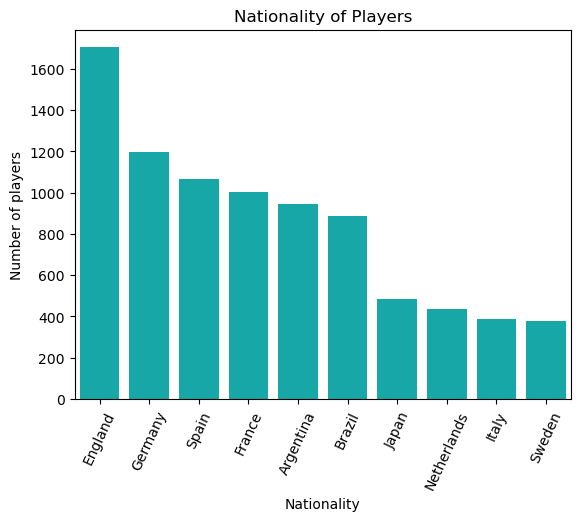

In [33]:
top_10 = data['Nationality'].value_counts().head(10)
sns.barplot(x=top_10.index, y=top_10.values, color='c')
plt.xlabel("Nationality")
plt.ylabel("Number of players")
plt.title("Nationality of Players")
plt.xticks(rotation = 65);

## Players Age range is from 16-53 years lets see age of all the players.

In [34]:
data['Age'].value_counts()

Age
23    1464
24    1426
22    1421
20    1408
21    1381
26    1287
28    1271
25    1239
27    1213
19    1076
29    1045
30     929
31     768
18     697
32     629
33     473
34     357
17     289
35     220
36     161
37      80
38      56
16      35
39      27
40      13
41       6
42       5
43       2
53       1
Name: count, dtype: int64

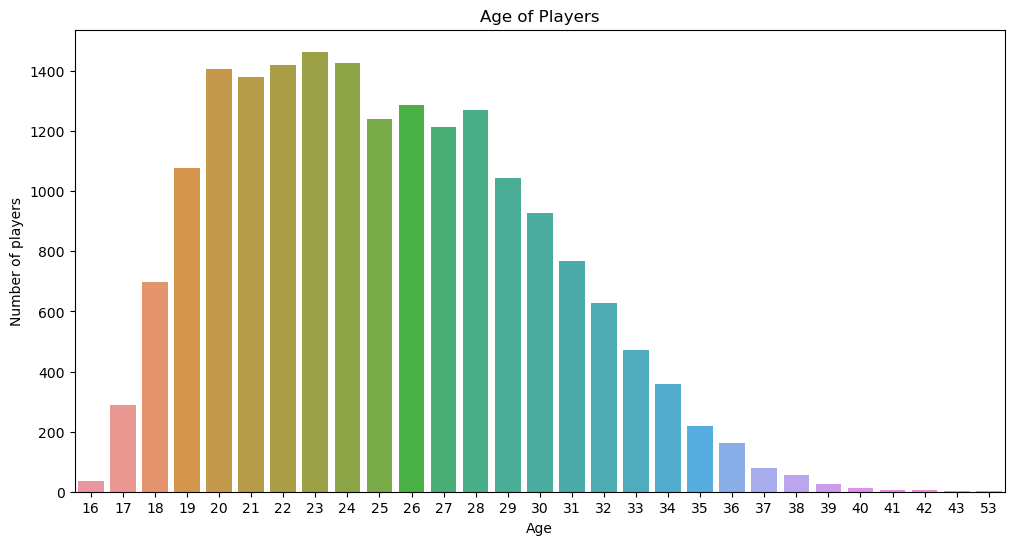

In [35]:
plt.figure(figsize = (12,6))
data_tmp = data['Age'].value_counts() 
sns.barplot(x=data_tmp.index, y=data_tmp.values)
plt.xlabel("Age")
plt.ylabel("Number of players")
plt.title("Age of Players");

## Number of Hits by top 10 Players with Highest Hits

In [36]:
data['Name'].value_counts()

Name
J. Rodríguez        13
Paulinho             8
J. García            7
J. González          7
M. Smith             7
                    ..
A. Feick             1
B. Halimi            1
O. Cabral            1
Lucas Possignolo     1
M. Flores            1
Name: count, Length: 17919, dtype: int64

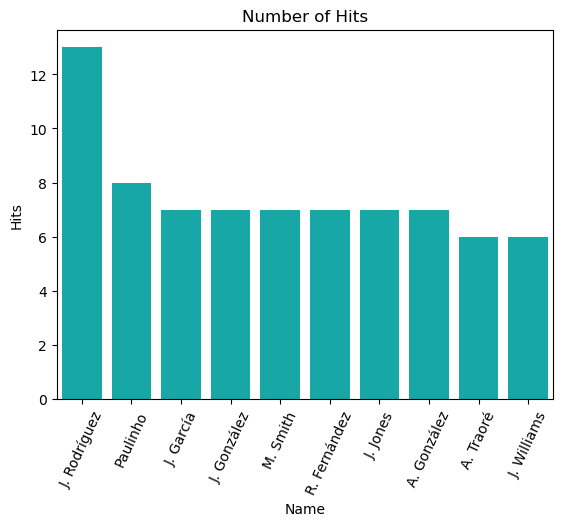

In [37]:
data_tmp2 = data['Name'].value_counts().head(10)
sns.barplot(x=data_tmp2.index, y=data_tmp2.values, color='c')
plt.xlabel("Name")
plt.ylabel("Hits")
plt.title("Number of Hits")
plt.xticks(rotation = 65);

## Lets see for best players having highest OVA and Hits

In [38]:
data.sort_values(by = ['↓OVA', 'Hits'], ascending = False)[['Name', '↓OVA', 'Hits']]

,Name,↓OVA,Hits
0,L. Messi,93,372
1,Cristiano Ronaldo,92,344
4,Neymar Jr,91,273
5,R. Lewandowski,91,182
3,K. De Bruyne,91,163
...,...,...,...
18970,Huang Wenzhou,47,2
18972,Wang Huapeng,47,2
18973,Chen Zitong,47,2
18974,Zhang Mengxuan,47,2


<Figure size 1500x600 with 0 Axes>

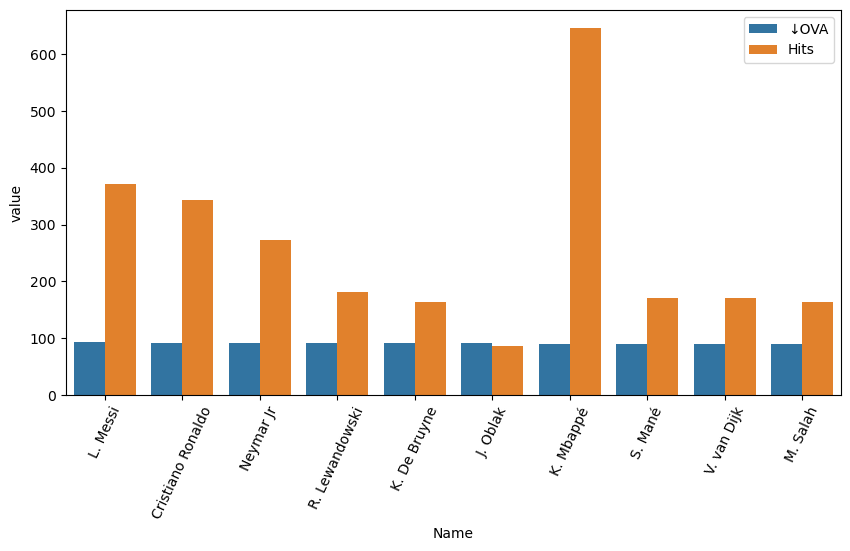

In [39]:
data_tmp3 = data.sort_values(by = ['↓OVA', 'Hits'], ascending = False)[['Name', '↓OVA', 'Hits']].head(10)

plt.figure(figsize=(15,6))
data_melted = pd.melt(data_tmp3, id_vars='Name', value_vars=['↓OVA', 'Hits'])
plt.figure(figsize=(10,5))
sns.barplot(x='Name', y='value', hue='variable', data=data_melted)
plt.xticks(rotation = 65)
plt.legend();

## Lets see how many teams participate in FIFA 2021

In [40]:
data['Team'].value_counts()

Team
                                 56
Spezia                           33
Chelsea                          33
Burnley                          33
West Ham United                  33
                                 ..
Clube Sport MarítimoJun 30, 2     1
Sheffield WednesdayJun 30, 2      1
Moreirense FCJun 30, 2            1
Leeds UnitedJun 30, 2             1
Macarthur FCAug 31, 2             1
Name: count, Length: 1163, dtype: int64

In [41]:
print(f"There are {data['Team'].value_counts().count()} different Teams participated in FIFA 2021")

There are 1163 different Teams participated in FIFA 2021


## Lets find which teams has the best 100 FIFA players?

In [42]:
data.columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height_cm', 'Weight_kg',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY',

In [43]:
Top_100_players = data.sort_values(by = '↓OVA', ascending = False).head(100)

In [44]:
Top_100_players['Team'].value_counts()

Team
Liverpool                   11
FC Barcelona                 9
Manchester City              9
Real Madrid                  9
Paris Saint-Germain          7
FC Bayern München            7
Juventus                     7
Chelsea                      5
Tottenham Hotspur            4
Inter                        4
Manchester United            4
Atlético Madrid              3
Napoli                       3
Lazio                        3
Borussia Dortmund            3
Leicester City               2
Arsenal                      2
Borussia Mönchengladbach     1
Real Sociedad                1
Atalanta                     1
Villarreal CF                1
Cagliari                     1
RB Leipzig                   1
Olympique Lyonnais           1
Milan                        1
Name: count, dtype: int64

In [45]:
print(f"There are {Top_100_players['Team'].value_counts().count()} Teams in FIFA 2021 with best 100 FIFA Players")

There are 25 Teams in FIFA 2021 with best 100 FIFA Players


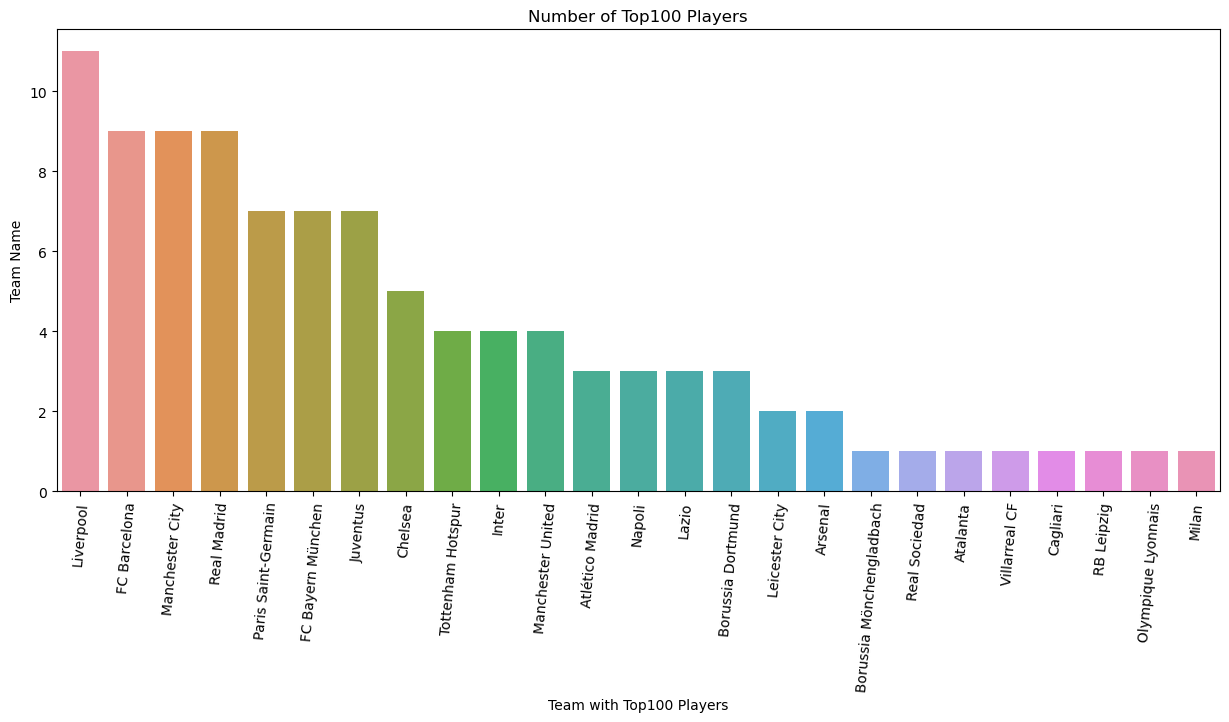

In [46]:
teams = Top_100_players['Team'].value_counts()

plt.figure(figsize=(15,6))
sns.barplot(x=teams.index, y=teams.values)
plt.xlabel("Team with Top100 Players")
plt.ylabel("Team Name")
plt.title("Number of Top100 Players")
plt.xticks(rotation = 85);

## Conclusion

**After exploring, the insights we got from the data are as follows:**

    1. We got to know that most of the players are from 'England', 'Germany', 'Spain', 'France' and 'Argentina'.
    2. The age of the players is from 16-53 most of the players' ages are around 20-24
    3. Highest number of Hits is 13 by J. Rodríguez
    4. Best player based on OVA and Hits is L. Messi with 93 OVA and 372 Hits
    5. There are 1163 different Teams participated in FIFA 2021
    6. There are 25 Teams in FIFA 2021 with best 100 FIFA Players
    7. The Liverpool team has 11 players among the 100 best FIFA players, the highest compared to other countries.